Bitte ausfüllen:
- [ ] ich habe die Aufgaben alleine gelöst
- [ ] Wir, ___________________ und ___________________, haben die Aufgaben als Zweierteam gelöst.


# Korrektur

Viel Erfolg!

### Bewertung

#### _/12 Punkte

----

In [2]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from scipy import stats                  # contains some fitting routines
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline

# Übungsaufgaben 02 - Beschreibende Statistik bei verbundenen Variablen

#### $\color{red}{\text{Neu}}$ für dieses A02 (und nächstes A03) Übungsblatt:
Sie müssen nicht, dürfen aber die Aufgaben in Zweierteams bearbeiten.
- Bitte arbeiten Sie wirklich zusammen. Hilft beim Studieren.
- Geben Sie unter *einem* Namen "IHRNAME" ab, vermerken Sie in der ersten Zelle jedoch Ihre beide Namen 
- Punkte werden jeder/m gutgeschrieben

#### Bitte lösen sie die Aufgaben 
- innerhalb dieses Notebooks 
- welches Sie bitte umbenennen in `A02_IHRNAME.ipynb` (IHRNAME passend ersetzen)
    - Bitte keine Leerzeichen, keine Sonderzeichen, keine Umlaute; Unterstrich und Minus gerne erlaubt.

und schicken das ausgeführte Notebook dann

#### bis zum Montag, 5. November 2018  22:00
als Anhang einer Email mit Titel "`Angewandte Statistik I`" an `uli.wannek@uni-tuebingen.de`

#### Danke!

### Hinweise
- Text-Antworten sowie $\LaTeX$-Formeln am besten in *markdown* Zellen
    - Praktisch ist, Text in `print('')`-Anweisungen auszugeben
    - Berechnete Werte mittels `print('{}'.format())` in code-Zellen angeben
- Sie dürfen in diesem Notebook gerne alles, was nicht zu den Aufgaben gehört, löschen.
- Sie dürfen gerne (zu Ihrem späteren **und** meinem jetzigen Verständnis) Kommentare in weiteren markdown-Zellen einfügen. Das hilft wirklich!
- Es gibt Punkte für
    - Ihre Überlegung und Begründung
    - Ihr Programm
    - Ihre Kommentare(!)
    - und schließlich für das richtige Ergebnis
    - mit Zusammenfassung wie zB.: *"der Mittelwert beträgt 17km/h"*
- Sie dürfen alle Antworten und Kommentare natürlich auf Deutsch oder Englisch verfassen.

- **Für manche Programmieraufgaben werden nur Ergebnisse, die ausgewertet werden sollen, gezeigt ohne dass die zugrundeliegenden Daten hinterlegt sind. Wenn solch eine Zelle ausgeführt wird, verschwinden die Ergebnisse und Abbildungen und das Notebook muss zur korrekten Bearbeitung erneut heruntergeladen werden** 

## 1. Korrelation 

### a) Randverteilung 边缘分布

In der Vorlesung wurde das Beispiel der Regentropfen auf einem Blatt Papier gezeigt. 

- Im Folgenden regneten (virtuell) 1000 Tropfen auf ein quadratisches Stück Papier. 
- Allerdings wurden hierbei zwei der vier Quadranten abgedeckt. 
- In der Graphik (aller Quadranten) sehen Sie die Randverteilungen.

Welche zwei Quadranten wurden abgedeckt? 

In [31]:
'''reshape some of the data by sorting'''
np.random.seed(987654)              # initialize random generator to same
rain = np.random.random((2, 700))   # draw 2x700 equally distrib random numbers
xa = np.sort(rain[0])               # sort x with numpy
xb = xa[:]                          # make a copy of the object
ya = np.sort(rain[1])               # sort y with numpy
n = int(rain.shape[1]/2)            # half index
yb = np.append( ya[n:], ya[:n])     # reorder 1st and 2nd half by split&join

'''scatterplot for two dimensional data 
   together with their marginal distributions'''
def xywithmarginals(x, y, col):
    fig = plt.figure(figsize=(5, 5))                              # square canvas
    bins = np.linspace(0.0, 1.0, 21)                              # 20 bins from 0 to 1
    # define a 4x4 grid and distribute the virtual squares:
    axmx = plt.subplot2grid((4, 4), (0, 0), colspan=3)            # upper marginal 3x1, until 3rd col.
    axmy = plt.subplot2grid((4, 4), (1, 3), rowspan=3)            # right marginal 1x3, start 2nd/last
    axxy = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3) # main window, size 3x3, skip 1st row
    axmx.hist(x, color=col, bins=bins, label='x', alpha=.5)       # x-marginal histogram
    axmx.xaxis.set_ticklabels([])                                 # no tickmarks
    axmy.hist(y, color=col, bins=bins, label='y', alpha=.5,
            orientation='horizontal')                             # y-marginal, rotated
    axmy.yaxis.set_ticklabels([])
    axxy.scatter(x, y, color=col, edgecolor='')                   # let it rain in big xy-panel
    axxy.axis([x.min(), x.max(), y.min(), y.max()]);              # restrict area to full data range


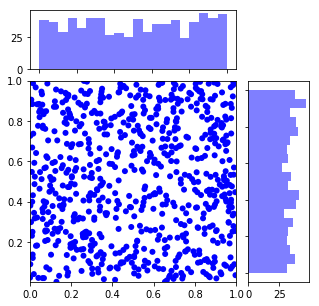

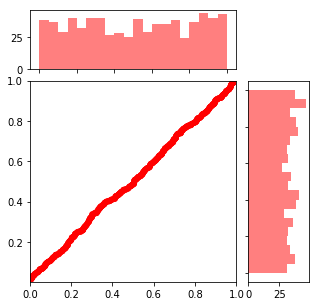

In [34]:
xywithmarginals(rain[0], rain[1], 'b')
xywithmarginals(xa, ya, 'r')

***Welche zwei Quadranten wurden abgedeckt?***

***Antwort:***

- Von der Randverteilingen koennen wir sehen , dass meisten Regentropfen ***in der ersten Quadrante*** und ***der drittten Quandrante*** liegen. Deswegen   wurden die erste Quadrante und die dritte Quadrante in dieser Grafik abgedeckt.

### b) Randverteilung und Korrelationskoeffizient

Wenn Sie nun zusätzlich wissen, dass der Korrelationskoeffizient `-0.756` beträgt, können Sie dann sagen, welche beiden Quadranten abgedeckt wurden? 

$\color{green}{2 \text{ Punkte}}$

***Antwort:***

- Es wird in 2. und 4. Quadranten abgedeckt.
- Ja. Der Wert von Korrelationsoeffizient ist kleiner als $0$ und die Absolutwert ist naeh $1$. Deswegen gibt es hier ein mittleren linearen Zusammenhang  $𝑦∼−𝑥$. Dann kann ich sagen ,wurden die zweite und vierte Quaranten abgedeckt.

## 2. Korrelation und Regression - Haustiere und Anwälte

Im Folgenden finden Sie Daten aus den Jahren 2000 bis 2009. 

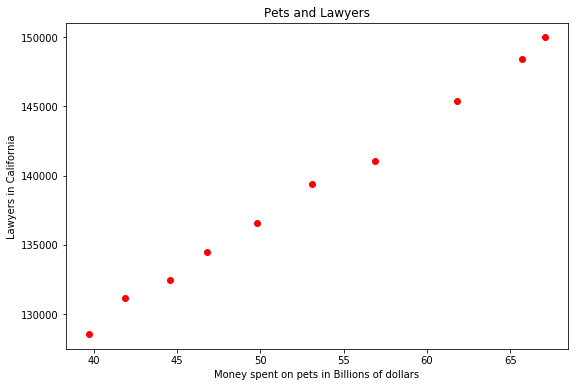

In [145]:
'''Data'''
# pets = Money spent on pets (US) - Billions of dollars (Bureau of Economic Analysis): 
pets = [39.7, 41.9, 44.6, 46.8, 49.8, 53.1, 56.9, 61.8, 65.7, 67.1] 
#y = Number of lawyers in California - Lawyers(ABA): 
lawyers = [128553, 131139, 132452, 134468, 136571, 139371, 141030, 145355, 148399, 149982]
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


'''Plot'''
f = plt.figure(figsize=(9, 6)) 
plt.plot(pets, lawyers, 'ro');
plt.xlabel('Money spent on pets in Billions of dollars')
plt.ylabel('Lawyers in California'); 
plt.title('Pets and Lawyers'); 

#### a) Beschreiben Sie, was sie in der Abbildung sehen. 

***Antwort:***

- Je mehr Geld an Haustier ausgeben, desto mehr Mensche als Anwaelte arbeiten in USA.
- Die beide Variablen ansteigen gleichzeitig.

#### b) Berechnen Sie den Korrelationskoeffizienten. 

In [149]:
corkoef = np.corrcoef(x=pets, y=lawyers)
print("Korrelationskoeffizienten ist: {:.6f}".format(corkoef[0,1]))

Korrelationskoeffizienten ist: 0.998386


#### c) Berechnen sie die Funktion der linearen Regression. 

In [151]:
'''use scipy'''
from scipy import stats

fit = stats.linregress(pets, lawyers) # e.g. linear regression fit
print('The linearen regression function is: y = {:.3f}*x + {:.3f}'.format(fit.slope, fit.intercept))

The linearen regression function is: y = 751.037*x + 99122.325


#### d) Diskutieren Sie ihr Ergebnis! 

***Antwort:***

- Von der Funktion von Linearen Regression wiesen wir, je mehr Kosten bei Haustiere, desto steigt die zaehle von Lawyers. Die Steigung ist ungefaehre 751.037. Es scheint, dass  normaleweise es  keinen Zusammenhang zwische Haistiere und Lawyers gibt. Aber im Laufe der Zeit mehr Konsume bei Haustiere bedeutet, die Leute wird mehr reicher. Dann haben sie auch Geld fuer das Anwaltsgebühren zu bezahlen. Deswegen steigt auch die Zaehle von Lawyers.

$\color{green}{3 \text{ Punkte}}$

## 3. Sonntagsfrage

Bei der Sonntagsfrage wird eine Bevölkerungsstichprobe nach ihrem hypothetischen Wahlverhalten gefragt: "welche Partei würden Sie wählen, wenn am Sonntag Bundestagswahl wäre".

Hinweis: bitte zeitliche Daten nur in ganzen Jahre betrachten, nicht tagesgenau.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

votes = pd.read_csv('A02.csv', sep=';')

#### a) Daten
Schauen Sie auf http://www.infratest-dimap.de/umfragen-analysen/bundesweit/sonntagsfrage/ 

Holen Sie für die dort 6 erstgenannten Parteien die Zahlen in 1-Jahres-Abständen inclusive des neuesten Ergebnisses (19. Okt 2018, 20. Okt. 2017, 21. Okt. 2016 und 23. Okt. 2015) und tragen diese praktischerweise in 6 ndarrays oder ein 2D ndarray ein.
(Wer `pandas` versteht, darf natürlich auch pandas benutzen)

Hinweise am Ende.

      Datum  Union  SPD  AfD  FDP  Linke*  Grüne
0  19.10.18     25   14   16   11       9     19
1  20.10.17     31   21   12   12       9     11
2  21.10.16     33   22   14    5       9     12
3  23.10.15     38   24    8    5       9     11


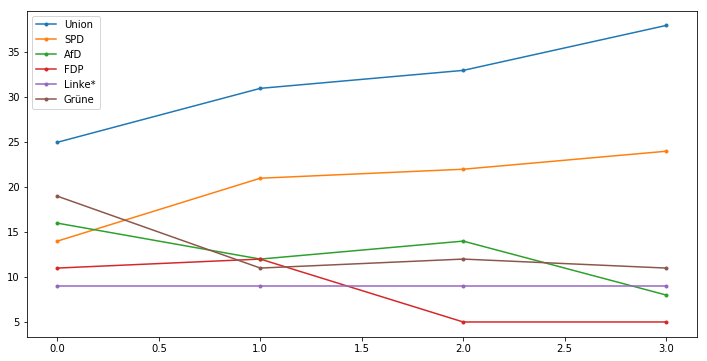

In [321]:
dates = votes['Datum']
parties = np.array(['Union', 'SPD', 'AfD', 'FDP', 'Linke*', 'Grüne'])
print(votes)
fig = plt.figure(figsize=(12,6))
plt.plot(votes.Union, '.-')
plt.plot(votes.SPD, '.-')
plt.plot(votes.AfD, '.-')
plt.plot(votes.FDP, '.-')
plt.plot(votes['Linke*'], '.-')
plt.plot(votes.Grüne, '.-')
plt.legend(parties);
# plt.xticks(votes.Datum.values)

#### b) Korrelation

Die Ergebnisse welcher zwei Parteien jeweils zeigen die betragsmäßig größte Korrelation?

Was bedeutet das?

(2 P.)

In [153]:
'''
Die Ergebnisse welcher zwei Parteien jeweils zeigen die betragsmäßig größte
Korrelation?
'''
cov = [];
max_cov = np.array([('1', '2'), 0]);
min_cov = np.array([('4', '3'), 0]);
# print(max_cov.shape, max_cov[1])
for idx, p1 in enumerate(parties):
    for idy, p2 in enumerate(parties):
        if idx < idy:
            tmp = np.asarray([(p1, p2), np.cov([votes[p1], votes[p2]])[0,1]])
            cov.append(tmp)
            #print(np.cov([votes[p1], votes[p2]]))
            # die betragsmäßig groesste positive Korrelation
            if tmp[1] > max_cov[1]:
                max_cov = tmp
            # die betragsmäßig groesste negative Korrelation
            if tmp[1] < min_cov[1]:
                min_cov = tmp

# print(np.asarray(cov))
print("die betragsmaessig groesste positive Korrelation: {} => {:.3f}"
      .format(max_cov[0], max_cov[1]))
print("die betragsmaessig groesste negative Korrelation: {} => {:.3f}"
      .format(min_cov[0], min_cov[1]))

die betragsmaessig groesste positive Korrelation: ('Union', 'SPD') => 22.417
die betragsmaessig groesste negative Korrelation: ('Union', 'Grüne') => -17.583


***Was bedeutet das?***

***Antwort:***

- Deshalb ist Union und SPD haben positive Korrelation. Zwischen Union und AfD gibt negative Korrelation.
- Das bedeutet, je mehr Union ausgewahlte ist, desto mehr SPD und weniger AfD wird ausgewahlt.

#### c) Wie groß ist die Regression
über den 4-Jahres-Zeitraum für die Ergebnisse aller 6 Parteien?

Welche Regression ist die größte, welches die kleinste? 

Was bedeutet das?

In [122]:
'''
Wie groß ist die Regression über den 4-Jahres-Zeitraum für die Ergebnisse aller
6 Parteien?
'''
cor = [];
max_cor = np.array([('1', '2'), 0]);
min_cor = np.array([('4', '3'), 0]);

for idx, p1 in enumerate(parties):
    for idy, p2 in enumerate(parties):
        if idx < idy:
            tmp = np.asarray([(p1, p2), np.corrcoef([votes[p1], votes[p2]])[0,1]])
            cor.append(tmp)
            #print(np.cov([votes[p1], votes[p2]]))
            # die betragsmäßig groesste positive Regression
            if tmp[1] > max_cor[1]:
                max_cor = tmp
            # die betragsmäßig groesste negative Regression
            if tmp[1] < min_cor[1]:
                min_cor = tmp

'''
Welche Regression ist die größte, welches die kleinste?
'''
print("die betragsmaessig groesste positive Regression: {} => {:.3f}".format(max_cor[0], max_cor[1]))
print("die betragsmaessig groesste negative Regression: {} => {:.3f}".format(min_cor[0], min_cor[1]))

die betragsmaessig groesste positive Regression: ('Union', 'SPD') => 0.958
die betragsmaessig groesste negative Regression: ('SPD', 'Grüne') => -0.957


/media/self/develop/branch.git/works/uni/publics/runtime/python3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/media/self/develop/branch.git/works/uni/publics/runtime/python3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


***Was bedeutet das?***

***Anser:***

- Das heisst, dass die Entwicklung der Anteil zwischen 'Union' und 'SPD' ahnlich ist.
- Das heisst, dass die Entwicklung der Anteile zwischen 'SPD' und 'Gruene' wiedersprucht ist.

#### d) Vergleich Regression und Korrelation
Wie groß sind die Regressionskoeffizienten aus c) für die beiden am stärksten korrelierenden Parteien aus b)?

Sehen Sie einen Zusammenhang?

parties    		| korrelation 	| regression
------------------------------------------------------
('Union', 'SPD')    	| 22.417 	| 0.958
('Union', 'AfD')    	| -16.500 	| -0.898
('Union', 'FDP')    	| -15.250 	| -0.751
('Union', 'Linke*')    	| 0.000 	| nan
('Union', 'Grüne')    	| -17.583 	| -0.847
('SPD', 'AfD')    	| -12.167 	| -0.819
('SPD', 'FDP')    	| -10.750 	| -0.655
('SPD', 'Linke*')    	| 0.000 	| nan
('SPD', 'Grüne')    	| -16.083 	| -0.957
('AfD', 'FDP')    	| 5.833 	| 0.452
('AfD', 'Linke*')    	| 0.000 	| nan
('AfD', 'Grüne')    	| 9.833 	| 0.745
('FDP', 'Linke*')    	| 0.000 	| nan
('FDP', 'Grüne')    	| 6.250 	| 0.429
('Linke*', 'Grüne')    	| 0.000 	| nan


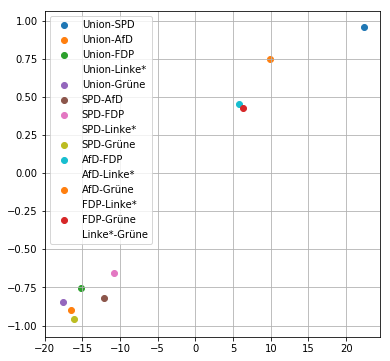

In [290]:
print("parties    \t\t| korrelation \t| regression\n"
      "------------------------------------------------------")
legends = []

fig = plt.figure(figsize=(6,6))
for i, co in enumerate(zip(cov, cor)):
    k, r = co[0], co[1]
    print("{}    \t| {:.3f} \t| {:.3f}".format(k[0], k[1], r[1]))
    plt.scatter(k[1], r[1])
    legends.append("{}-{}".format(k[0][0], k[0][1]))

# print(legends)
plt.legend(legends)
plt.grid(True)

***Sehen Sie einen Zusammenhang?***

***Antwort:***

- Es ist deutlich zu sehen, dass es ein positive Korrelation zwischen Regression und Korrelation gibt.

#### e) Wie groß ist die Regression
zwischen den beiden Parteien aus b)? (Partei mit den größeren Schwankungen auf der x-Achse)

Was könnte das bedeuten?

In [325]:
'''
Wie groß ist die Regression zwischen den beiden Parteien aus b)?
(Partei mit den größeren Schwankungen auf der x-Achse)
Union und SPD
'''
fit = stats.linregress(votes.Union, votes.SPD)
print("die Regression zwischen {}: \ty = {:.3f}*x + {:.3f}".format("Union-SPD", fit.slope, fit.intercept))

die Regression zwischen Union-SPD: 	y = 0.775*x + -4.363


***Was könnte das bedeuten?***

***Antwort:***

- Die Entwicklung der Anteile von Union und SPD ist gegeneinander abhaengig.


#### f) Vorhersage
Die nächste Wahl findet voraussichtlich im September 2021 statt. 

Wie würden die sechs Parteien bei linearer Regression (Aufgabenteil c) abschneiden (ganze Jahre sind ausreichnd)?

Was ist die Summe aller vorhergesagten Ergebnisse? Was schließen Sie daraus?

In [341]:
'''
Wie würden die sechs Parteien bei linearer Regression (Aufgabenteil c)
abschneiden (ganze Jahre sind ausreichnd)?
'''
vorhersage = []
x = np.arange(4)
for i, p in enumerate(parties):
    fit = stats.linregress(x, votes[p])
    print("{} \ty = {:.3f}*x + {:.3f}".format(p, fit.slope, fit.intercept))
    vorhersage.append(4*fit.slope+fit.intercept)

Union 	y = 4.100*x + 25.600
SPD 	y = 3.100*x + 15.600
AfD 	y = -2.200*x + 15.800
FDP 	y = -2.500*x + 12.000
Linke* 	y = 0.000*x + 9.000
Grüne 	y = -2.300*x + 16.700


In [344]:
'''
Was ist die Summe aller vorhergesagten Ergebnisse?
'''
print("vorhersage(2021):\nPartie\t| Anteil\n"
     "--------------------")
for i, p in enumerate(parties):
    print("{}\t| {}".format(p, vorhersage[i]))

print("Summe: {}".format(np.sum(vorhersage)))

vorhersage(2021):
Partie	| Anteil
--------------------
Union	| 42.0
SPD	| 28.0
AfD	| 7.0
FDP	| 2.0
Linke*	| 9.0
Grüne	| 7.5
Summe: 95.5


***Was schließen Sie daraus?***

***Antwort:***

- Ich nehme an, dass Union noch die grosste Patei und danach SPD ist.

$\color{green}{7 \text{ Punkte}}$

#### Python Hinweise

In [81]:
'''work with lists'''
mylist = ['a', 'b', 'c', 'd']
mylist.remove('b')
print(mylist)

l1 = mylist[1:]
l2 = mylist[:-1]
print(l2)
for a, b in zip(l1, l2):
    print(a, b)

['a', 'c', 'd']
['a', 'c']
c a
d c


In [79]:
import numpy as np

parties = ['a', 'b', 'c']                              # list of name strings
votes = np.asarray([[4, 5, 6], [3, 5, 7], [6, 4, 4]])  # and value-vectors thereof
for n1, p1 in enumerate(parties):                      # outer and 
    for n2, p2 in enumerate(parties):                  # inner loop make 2D
        if p1<p2:                                      # but not same-same or twice
            print('{} and {} sum up to {}'.format(p1, p2, votes[n1]+votes[n2]))

a and b sum up to [ 7 10 13]
a and c sum up to [10  9 10]
b and c sum up to [ 9  9 11]


In [80]:
'''numpy matrix operations'''
p1 = np.asarray([22, 21, 20])
p2 = np.asarray([14, 15, 16])
print(np.vstack((p1, p2)))
print(np.vstack((p1, p2)).T)
print(np.hstack((p1, p2)))
print(np.hstack(([p1], [p2])).T)

[[22 21 20]
 [14 15 16]]
[[22 14]
 [21 15]
 [20 16]]
[22 21 20 14 15 16]
[[22]
 [21]
 [20]
 [14]
 [15]
 [16]]
